In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt


C:\Users\Subodh Nagrale\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Subodh Nagrale\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Subodh Nagrale\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.models import Sequential


In [3]:
# XRP/USD pair analysis

crypto_curr ='XRP'
fiat_curr = 'USD'

In [4]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [5]:
data = web.DataReader(f'{crypto_curr}-{fiat_curr}','yahoo', start, end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,0.006184,0.006039,0.006184,0.006040,3.743550e+05,0.006040
2016-01-01,0.006044,0.005933,0.006040,0.005955,2.117670e+05,0.005955
2016-01-02,0.006079,0.005933,0.005957,0.006065,2.785390e+05,0.006065
2016-01-03,0.006070,0.005988,0.006066,0.006017,2.917230e+05,0.006017
2016-01-04,0.006059,0.005953,0.006019,0.005958,3.108200e+05,0.005958
...,...,...,...,...,...,...
2021-11-03,1.233025,1.126961,1.135938,1.208796,6.526804e+09,1.208796
2021-11-04,1.253728,1.166933,1.210519,1.202003,5.210116e+09,1.202003
2021-11-05,1.202404,1.141375,1.201917,1.161533,3.572444e+09,1.161533


In [6]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2135.000000,2135.000000,2135.000000,2135.000000,2.135000e+03,2135.000000
mean,0.388661,0.351190,0.370162,0.370745,1.938017e+09,0.370745
std,0.419015,0.359167,0.388848,0.389212,3.594683e+09,0.389212
min,0.005192,0.005011,0.005109,0.005112,5.478200e+04,0.005112
25%,0.178700,0.165628,0.174090,0.174208,7.699845e+07,0.174208
50%,0.282471,0.264747,0.273473,0.274080,8.095980e+08,0.274080
75%,0.483092,0.450943,0.466416,0.467159,2.087343e+09,0.467159
max,3.841940,3.117340,3.363570,3.377810,3.695518e+10,3.377810


In [7]:
data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,0.006184,0.006039,0.006184,0.006040,374355.0,0.006040
2016-01-01,0.006044,0.005933,0.006040,0.005955,211767.0,0.005955
2016-01-02,0.006079,0.005933,0.005957,0.006065,278539.0,0.006065
2016-01-03,0.006070,0.005988,0.006066,0.006017,291723.0,0.006017
2016-01-04,0.006059,0.005953,0.006019,0.005958,310820.0,0.005958
2016-01-05,0.006044,0.005953,0.005954,0.006044,381554.0,0.006044
2016-01-06,0.006044,0.005983,0.006044,0.006003,316235.0,0.006003
2016-01-07,0.006090,0.005998,0.005998,0.006039,426048.0,0.006039
2016-01-08,0.006055,0.005905,0.006040,0.005933,288641.0,0.005933


In [27]:
# Prepare Data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(data['Close'].values.reshape(-1,1))


array([[2.75150660e-04],
       [2.49948300e-04],
       [2.82563111e-04],
       ...,
       [3.42877126e-01],
       [3.40185222e-01],
       [3.59532505e-01]])

In [9]:
prediction_days=60
x_train,y_train=[],[]

In [10]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [11]:
x_train,y_train =np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
#Create Nueral Network
model=Sequential() #as data is sequential

#LSTM layer
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
65/65 [==============================] - 3s 50ms/step - loss: 0.0045
Epoch 2/25
65/65 [==============================] - 3s 48ms/step - loss: 0.0020
Epoch 3/25
65/65 [==============================] - 3s 50ms/step - loss: 0.0018
Epoch 4/25
65/65 [==============================] - 3s 48ms/step - loss: 0.0014
Epoch 5/25
65/65 [==============================] - 3s 48ms/step - loss: 0.0012
Epoch 6/25
65/65 [==============================] - 3s 50ms/step - loss: 0.0012
Epoch 7/25
65/65 [==============================] - 3s 48ms/step - loss: 0.0012
Epoch 8/25
65/65 [==============================] - 3s 49ms/step - loss: 9.5153e-04
Epoch 9/25
65/65 [==============================] - 3s 48ms/step - loss: 9.2812e-04
Epoch 10/25
65/65 [==============================] - 3s 48ms/step - loss: 8.9430e-04
Epoch 11/25
65/65 [==============================] - 3s 48ms/step - loss: 7.6321e-04
Epoch 12/25
65/65 [==============================] - 3s 50ms/step - loss: 8.7385e-04
Epoch 13/25
65/65

In [13]:
x_train

array([[[2.75150660e-04],
        [2.49948300e-04],
        [2.82563111e-04],
        ...,
        [8.73484832e-04],
        [8.47985902e-04],
        [8.23376406e-04]],

       [[2.49948300e-04],
        [2.82563111e-04],
        [2.68331211e-04],
        ...,
        [8.47985902e-04],
        [8.23376406e-04],
        [8.33457294e-04]],

       [[2.82563111e-04],
        [2.68331211e-04],
        [2.50837872e-04],
        ...,
        [8.23376406e-04],
        [8.33457294e-04],
        [8.58066791e-04]],

       ...,

       [[4.10443212e-01],
        [3.32074483e-01],
        [3.24846176e-01],
        ...,
        [3.35364749e-01],
        [3.56890544e-01],
        [3.54876423e-01]],

       [[3.32074483e-01],
        [3.24846176e-01],
        [3.21490097e-01],
        ...,
        [3.56890544e-01],
        [3.54876423e-01],
        [3.42877126e-01]],

       [[3.24846176e-01],
        [3.21490097e-01],
        [3.11962396e-01],
        ...,
        [3.54876423e-01],
        [3.4287

In [14]:
y_train

array([0.00083346, 0.00085807, 0.00086518, ..., 0.34287713, 0.34018522,
       0.35953251])

In [15]:
#TESTING DATA
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()

In [16]:
test_data = web.DataReader(f'{crypto_curr}-{fiat_curr}','yahoo', test_start, test_end)
actual_price=test_data['Close'].values

In [17]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,0.194878,0.189969,0.194518,0.192894,1.116761e+09,0.192894
2020-01-01,0.194362,0.192107,0.192912,0.192667,1.041134e+09,0.192667
2020-01-02,0.192896,0.186947,0.192708,0.188043,1.085351e+09,0.188043
2020-01-03,0.194070,0.185846,0.187948,0.193521,1.270017e+09,0.193521
2020-01-04,0.194653,0.191835,0.193521,0.194355,9.993316e+08,0.194355
...,...,...,...,...,...,...
2021-11-03,1.233025,1.126961,1.135938,1.208796,6.526804e+09,1.208796
2021-11-04,1.253728,1.166933,1.210519,1.202003,5.210116e+09,1.202003
2021-11-05,1.202404,1.141375,1.201917,1.161533,3.572444e+09,1.161533


In [18]:
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)
total_dataset

Date
2015-12-31    0.006040
2016-01-01    0.005955
2016-01-02    0.006065
2016-01-03    0.006017
2016-01-04    0.005958
                ...   
2021-11-03    1.208796
2021-11-04    1.202003
2021-11-05    1.161533
2021-11-06    1.152454
2021-11-07    1.216633
Name: Close, Length: 2809, dtype: float64

In [19]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.fit_transform(model_inputs)

In [20]:
x_test=[]
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [21]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [22]:
prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

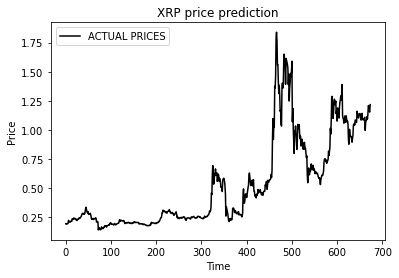

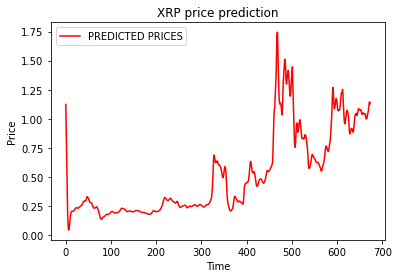

In [23]:
#Actual Price Graph
plt.plot(actual_price,color='BLACK',label='ACTUAL PRICES')
plt.title(f'{crypto_curr} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

#Predicted Price Graph for 61st day price using previous 60days data
plt.plot(prediction_prices,color='RED',label='PREDICTED PRICES')
plt.title(f'{crypto_curr} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()    


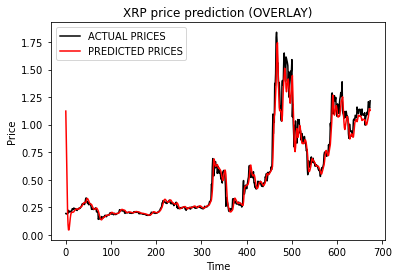

In [24]:
plt.plot(actual_price,color='BLACK',label='ACTUAL PRICES')
plt.plot(prediction_prices,color='RED',label='PREDICTED PRICES')
plt.title(f'{crypto_curr} price prediction (OVERLAY)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()
        

In [25]:
#Predict Next day

real_data =[model_inputs[len(model_inputs)+1 -prediction_days:len(model_inputs)]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [26]:
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
print('Next Day Closing Price of ' ,crypto_curr ,'is' ,prediction)

Next Day Closing Price of  XRP is [[1.1227714]]
